# ols

- we all know the weight is 
$$
\widehat{\theta}=\left(X^{T} X\right)^{-1} X^{T} Y
$$

In [3]:
import numpy as np
def linear_loss(X,y,w,b):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    # model formula
    y_hat = np.dot(X,w)+b
    # loss function
    loss = np.sum((y_hat-y)**2)/num_train
    # partial derivative
    dw = np.dot(X.T,(y_hat-y))/num_train
    db = np.sum((y_hat-y))/num_train
    return y_hat,loss,dw,db

In [13]:
# initialize parameters
def initialize_params(dims):
    w = np.zeros((dims,1))
    b = 0
    return w,b

#gradient descent
def linear_train(X,y,learning_rate,epochs):
    w,b = initialize_params(X.shape[1])
    loss_list = []
    for i in range(1,epochs):
        #calculate prediction,loss and partial derivative
        y_hat,loss,dw,db = linear_loss(X,y,w,b)
        loss_list.append(loss)
        #update w and b based on gradient descent
        w = w-learning_rate*dw
        b = b-learning_rate*db
        # save number of iterations and loss in the process
        params = {
            'w':w,
            'b':b
        }
        grads = {
            'dw':dw,
            'db':db
        }
    return loss_list,loss,params,grads

- now let's begin to use this simplify model to train the dataset from sklearn's diabetes

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

In [10]:
# scramble data
X,y = shuffle(data,target,random_state = 13)
X = X.astype(np.float32)
# the cutting of training dataset and test dataset 
offset = int(X.shape[0]*0.9)
X_train,y_train = X[:offset],y[:offset]
X_test,y_test = X[offset:],y[offset:]
y_train = y_train.reshape((-1,1))#-1 can replace any number, and the second dim is 1
y_test = y_test.reshape((-1,1))
print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (397, 10)
X_test= (45, 10)
y_train= (397, 1)
y_test= (45, 1)


In [14]:
loss_list, loss, params, grads = linear_train(X_train, y_train, 0.001, 100000)

In [15]:
print(params)

{'w': array([[  44.07229775],
       [  -6.99872355],
       [ 157.0665895 ],
       [ 118.32921584],
       [  37.47920655],
       [  24.97681831],
       [-104.31188822],
       [ 104.03504877],
       [ 148.85521477],
       [  94.07047013]]), 'b': 151.57222424703687}


In [16]:
# now define a function to predict the test dataset value
def predict(X, params):
    w = params['w']
    b = params['b']

    y_pred = np.dot(X, w) + b    
    return y_pred

y_pred = predict(X_test, params)
y_pred

array([[132.02545017],
       [141.77423134],
       [150.48352021],
       [128.48666753],
       [147.29312454],
       [160.33654415],
       [157.96486039],
       [143.53574754],
       [116.71150146],
       [132.12496168],
       [165.00305271],
       [187.26683995],
       [129.61766397],
       [149.92020187],
       [199.64645411],
       [117.32936604],
       [146.44665923],
       [184.06077493],
       [158.58239786],
       [171.57568527],
       [109.09059229],
       [147.88964433],
       [176.72561139],
       [172.93333518],
       [161.52867027],
       [179.72838262],
       [117.37798655],
       [162.80734611],
       [107.49854614],
       [139.91345225],
       [135.39748085],
       [146.79037116],
       [133.25673311],
       [100.40015751],
       [134.61907156],
       [162.53351066],
       [172.18058828],
       [150.98972943],
       [138.15983183],
       [186.52674328],
       [185.03834407],
       [162.99479253],
       [159.31985856],
       [162

- The content above split w and b, the next section would think the two as a whole

- loss funciton
$$
J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}
$$

- batch gradient descent
$$
\theta_{j}=\theta_{j}+\alpha \frac{1}{m}(y-X \theta)^{T} x_{j}
$$

In [4]:
import numpy as np 
import matplotlib as plt
import time

In [5]:
def exeTime(func):
    ''' a decorator for calculating time'''
    def newFunc(*args,**keywards):
        t0 = time.time()
        back = func(*args,**keywards)
        return back,time.time()-t0
    return newFunc

In [33]:
def J(theta,X,y):
    '''loss funciton, so we need to initialize a theta matrix'''
    '''
    args:
        theta: parameters
        X:features
        y:labels
    return:
        loss function
    '''
    m = len(X)
    return (X*theta-y).T*(X*theta-y)/(2*m)

@exeTime
def bgd(rate,maxloop,epsilon,X,y):
    '''batch gradient descent
    args:
        rate: learning rate
        matxloops: max number of iterations
        epsilon: convergence accuracy
        X: features
        y: labels
    return:
        (theta,errors,thetas),time elapsed 
    '''
    m,n = X.shape
    # initialize theta
    theta = np.zeros((n,1))
    count = 0
    converged = False
    error = float('inf')
    errors = []
    thetas = {}
    for j in range(n):
        thetas[j] = [theta[j,0]] #put theta value to a list
    while count <= maxloop:
        if (converged):
            break
        count = count + 1
        for j in range(n):
            deriv = (y-X*theta).T*X[:,j]/m
            theta[j,0] = theta[j,0]+rate*deriv
            thetas[j].append(theta[j,0])
        error = J(theta,X,y)
        errors.append(error[0,0])
        if (error<epsilon):
            converged = True
    return theta,errors,thetas
            

## Stochastic Gradient Descent
- consider Stochastic Gradient Descent, the method update by using a dataset's information. It accelerates the training process but causes some problems like not stable or can't be convergent at the same time.

$$
\theta_{j}=\theta_{j}+\alpha\left(y^{(i)}-h_{\theta}\left(x^{(i)}\right)\right) x_{j}^{(i)}
$$

In [27]:
@exeTime
def sgd(rate,maxloop,epsilon,X,y):
    '''stochastic gradient descent
    args:
        rate: learning rate
        maxloop: max number of iteration
        epsilon: convergent accuracy
        X: feature matrix
        y: label matrix

    return:
        (theta,error,thetas), time elapse
    '''
    m,n = X.shape
    #initialize theta
    theta = np.zeros((n,1))
    count = 0
    converged = False
    error = float('inf')
    errors = []
    thetas = {}
    for j in range(n):
        thetas[j] = [theta[j,0]]
    while count<= maxloop:
        if converged:
            break
        count = count + 1
        errors.append(float('inf'))
        for i in range(m):
            if converged:
                break
            diff = y[i,0]-h(theta,X[i].T)
            for j in range(n):
                theta[j,0] = theta[j,0] + rate*diff*X[i,j]
                thetas[j].append(theta[j,0])
            error = J[theta,X,y]
            errors[-1] = error[0,0]
            if (error < epsilon):
                converged = True
    return theta, errors, thetas


In [16]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import os

In [12]:
def loadDataSet(filename):
    """ 读取数据

    从文件中获取数据，在《机器学习实战中》，数据格式如下
    "feature1 TAB feature2 TAB feature3 TAB label"

    Args:
        filename 文件名

    Returns:
        X 训练样本集矩阵
        y 标签集矩阵
    """
    numFeat = (len(open(filename).readline().split('\t')) - 1)
    X = []
    y = []
    file = open(filename)
    for line in file.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        X.append(lineArr)
        y.append(float(curLine[-1]))
    return np.mat(X), np.mat(y).T


In [35]:
# .. indicate its parent's dir
X, y =loadDataSet('../mit-ml/linear_regression/data/ex1.txt')
m,n = X.shape
X = np.concatenate((np.ones((m,1)), X), axis=1)#add one column to X
rate = 0.02
maxloop = 1500
epsilon = 0.01
result, timeConsumed = bgd(rate, maxloop,epsilon, X, y)
theta,errors,thetas = result

In [56]:
X[:, 1].flatten()[[0]]

matrix([[ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
          8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
          5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
         20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
         13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
          7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
         11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
          5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
          6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
         14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
         10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
          5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
          6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
          7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369]])

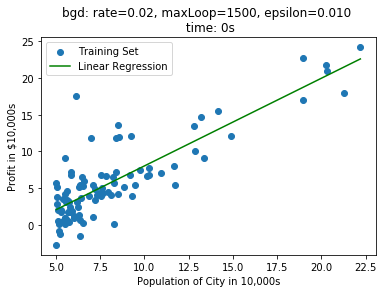

In [59]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick# 绘制拟合曲线

fittingFig = plt.figure()
title = 'bgd: rate=%.2f, maxLoop=%d, epsilon=%.3f \n time: %ds'%(rate,maxLoop,epsilon,timeConsumed)
ax = fittingFig.add_subplot(111, title=title)#111表示这幅图的位置
trainingSet = ax.scatter(X[:, 1].flatten().A[0], y[:,0].flatten().A[0])#散点图
# 注：
# matrix.A  中的 A ：array 
# 表示将矩阵 matrix转换为二维数组
# matrix.A[0] :取二维数组中第一行元素

xCopy = X.copy()
xCopy.sort(0)
yHat = xCopy*theta
fittingLine, = ax.plot(xCopy[:,1], yHat, color='g')

ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')

plt.legend([trainingSet, fittingLine], ['Training Set', 'Linear Regression'])
plt.show()

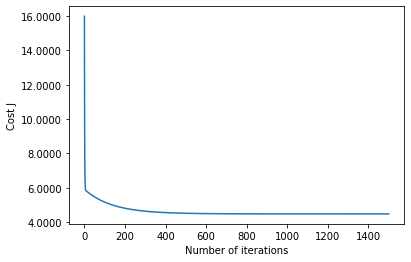

In [37]:
# 绘制误差曲线
errorsFig = plt.figure()
ax = errorsFig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))#设置其y轴的精度

ax.plot(range(len(errors)), errors)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')

plt.show()

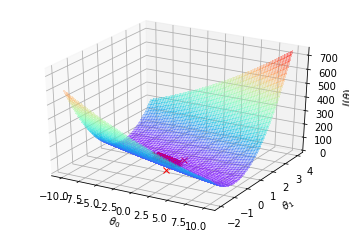

In [39]:
# 绘制能量下降曲面
size = 100
theta0Vals = np.linspace(-10,10, size)
theta1Vals = np.linspace(-2, 4, size)
JVals = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        col = np.matrix([[theta0Vals[i]], [theta1Vals[j]]])
        JVals[i,j] = J(col, X, y)

theta0Vals, theta1Vals = np.meshgrid(theta0Vals, theta1Vals)
JVals = JVals.T
contourSurf = plt.figure()
ax = contourSurf.gca(projection='3d')

ax.plot_surface(theta0Vals, theta1Vals, JVals,  rstride=2, cstride=2, alpha=0.3,
            cmap=cm.rainbow, linewidth=0, antialiased=False)
ax.plot(thetas[0], thetas[1], 'rx')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')

plt.show()

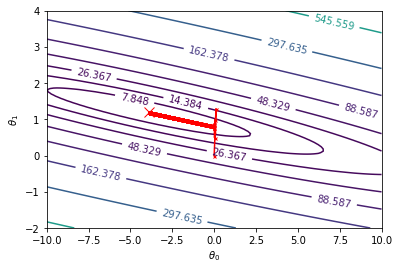

In [44]:
# 绘制能量轮廓
contourFig = plt.figure()
ax = contourFig.add_subplot(111)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

CS = ax.contour(theta0Vals, theta1Vals, JVals, np.logspace(-2,3,20))
plt.clabel(CS, inline=1, fontsize=10)
# 绘制最优解
ax.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2)
# 绘制梯度下降过程
ax.plot(thetas[0], thetas[1], 'rx', markersize=3, linewidth=1)
ax.plot(thetas[0], thetas[1], 'r-')

plt.show()